#Utility functions, parameters, and Google Drive


In [ ]:
# @title General parameters { run: "auto", display-mode: "form" }

_replace_data_files = True  # @param {type:"boolean"}
_device = "cuda"  # @param {type:"string"}
_nb_epochs = 21  # @param {type:"integer"}
_train_valid_split = 0.9  #@param {type:"slider", min:0.5, max:0.95, step:0.05}
_padded_string_length = 500  # @param {type:"integer"}
_embedding_size = 128  # @param {type:"integer"}
_filter_sizes = (3,4,5)  # @param {type:"raw"}
_num_filter = 128  # @param {type:"integer"}
_batch_size = 128  # @param {type:"integer"}
_learning_rate = 0.01  # @param {type:"number"}
_momentum = 0.1  # @param {type:"number"}
_weight_decay = 0  # @param {type:"number"}
_step_size = 10  # @param {type:"integer"}
_gamma = 0.5  # @param {type:"number"}
_log_interval = 1  # @param {type:"integer"}


In [ ]:
#@title Google Drive {run: "auto"}
from google.colab import drive
import os

drive.mount('/gdrive', force_remount=True)
drive_folder = "COMP762_IntentionMining" # @param {type:"string"}
drive_folder = os.path.join("/gdrive/My Drive/", drive_folder)


Mounted at /gdrive


In [ ]:
# @title Download data from Google Drive

import os
import gdown
import zipfile
import shutil

zfile = "Intention-Mining-data.zip"
url = "https://drive.google.com/uc?id=1T4aW9vwu1A01-XUZ5AugoHhBR2IVrame"
print("Downloading {}:".format(zfile))
if not os.path.isfile(zfile):
    gdown.download(url, zfile, 0)
else:
    print('File already exists. Continuing.')


z = zipfile.ZipFile(zfile, 'r')
print("Extracting data...")
# Remove old paths
if os.path.exists('data'):
    !rm -r data
# Unzip data and runs
with zipfile.ZipFile(zfile, 'r') as z:
    for filename in z.namelist():
        if filename.startswith("data/"):
            z.extract(filename)
print("done")

Downloading...
From: https://drive.google.com/uc?id=1T4aW9vwu1A01-XUZ5AugoHhBR2IVrame
To: /content/Intention-Mining-data.zip
100%|██████████| 238k/238k [00:00<00:00, 95.6MB/s]

Extracting data...
done


In [ ]:
# @title Download Token, Sentence, StanfordFiles, GetAllText(), and GetAllCategories()
import gdown

gdown.download("https://drive.google.com/uc?id=1lsi836Dfkx0S_UUAJwTPRdqolW2UREl0", 'aim_parsed_text.py', False)

# Reload just in case
import importlib, aim_parsed_text
GetAllText = aim_parsed_text.GetAllText
GetTextByCategories = aim_parsed_text.GetTextByCategories
Token = aim_parsed_text.Token
Sentence = aim_parsed_text.Sentence
StanfordFiles = aim_parsed_text.StanfordFiles


Downloading...
From: https://drive.google.com/uc?id=1lsi836Dfkx0S_UUAJwTPRdqolW2UREl0
To: /content/aim_parsed_text.py
100%|██████████| 25.5k/25.5k [00:00<00:00, 25.1MB/s]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

Downloading...
From: https://drive.google.com/uc?id=1MYR04EN9wyEw5C-RhpAmX5Xnat-jiBSy
To: /content/Automating-Intention-Mining-parsed-data.tar.gz
5.81MB [00:00, 183MB/s]


done
Extracting files... 
Extracting files... done


functions:
  def GetAllText(
    word, show_pos,
    remove_punctuation, remove_stopwords,
    get_ancestors, projects_to_exclude
  )
    Returns all text as a list.
    (See parameter descriptions below)

  def GetTextByCategories(
    word, show_pos,
    remove_punctuation, remove_stopwords,
    get_ancestors, projects_to_exclude
)
    Returns a dictionary with category names as keys and lists of
    sentences belonging to that category as values.

    Parameters:
      word: "word" (original text) or lemma.
      show_pos: show Part-Of-Speech tag?
      remove_punctuation: self-explanatory.
      remove_stopwords: self-explanatory.
      get_ancestors: if True, get each token's ancestor's label (chunk).
      projects_to_exclude: self-explanatory. E.g., ["DECA", "vscode"]


classes:
  class Token
    Token(default_format, properties)
      default_format: function returning format string (e.g.,
        "{{lemma}}")
      propertie

In [ ]:
# @title Download datasets from Google Drive, and define Sentence, Token, GetAllText() and GetTextByCategories() [COMMENTED OUT] {display-mode: "form"}

# import os
# import gdown
# import json
# import re
# import nltk
# nltk.download('stopwords')

# class Token:
#   def __init__(self, default_format, properties):
#     if not callable(default_format):
#       self.default_format = lambda: default_format
#     else:
#       self.default_format = default_format
#     self.properties = properties
  
#   def __getitem__(self, ix):
#     return self.properties.__getitem__(ix)

#   def __setitem__(self, ix, val):
#     return self.properties.__setitem__(ix, val)

#   def to_string(self, format_):
#     return format_.format(**self.properties)

#   def __string_rep(self):
#     return self.to_string(self.default_format())

#   def __str__(self):
#     return self.__string_rep()
  
#   def __repr__(self):
#     return self.__str__() + ": " + self.properties.__repr__()

#   def __hash__(self):
#     return self.__string_rep().__hash__()

#   def __eq__(self, other):
#     return self.__string_rep() == other.__string_rep()
  
#   def __gt__(self, other):
#     return self.__string_rep() > other.__string_rep()
    
#   def __lt__(self, other):
#     return self.__string_rep() < other.__string_rep()


# class Sentence:
#   def __init__(self, json_, fmt, get_ancestor):
#     self.json = {**json_}
#     self.fmt = fmt
#     # Lowercase lemmata (plural of lemma)
#     for t in self.json['tokens']:
#       t['lemma'] = t['lemma'].lower()
#     # Create tokens
#     self.tokens = \
#     [
#       Token(self.getFormat, token) 
#       for token in self.json['tokens']
#     ]
#     # Find each token's ancestor
#     if get_ancestor:
#       tree = self.makeParseTree()
#       for ix, token in enumerate(self.tokens):
#         tree_ix = tree.leaf_treeposition(ix)
#         token["ancestor"] = tree[tree_ix[:-2]].label()
  
#   def __getitem__(self, ix):
#     return self.tokens[ix]
  
#   def __setitem__(self, ix, val):
#     self.tokens[ix] = val

#   def getFormat(self):
#     return self.fmt
  
#   def setFormat(self, newFmt):
#     self.fmt = newFmt
  
#   def withoutPunctuation(self):
#     without = Sentence({**self.json}, self.getFormat(), False)
#     # Remove punctuation from parse
#     parse = self.json["parse"]
#     punct_ix = list(re.finditer("\([^a-zA-Z0-9(]\S* \S*[^a-zA-Z0-9)]\)", parse))
#     for m in reversed(punct_ix):
#       parse = parse[:m.start()]+ parse[m.end():]
#     without.json["parse"] = parse
#     # Remove punctuation from tokens
#     tokens = []
#     for ix, t in enumerate(self.tokens):
#       if t["pos"][0].isalpha():
#         tokens.append(Token(without.getFormat, {**t.properties}))
#       elif 0 < len(tokens):
#         tokens[-1]["after"] += t["after"]
#     without.tokens = tokens
#     # Done, leave the other fields untouched
#     return without

#   def withoutStopWords(self):
#     without = Sentence({**self.json}, self.getFormat(), False)
#     # Remove stopwords from tokens
#     tokens = []
#     for ix, t in enumerate(self.tokens):
#       if t["lemma"].lower() not in stopwords.words('english'):
#         tokens.append(Token(without.getFormat, {**t.properties}))
#     without.tokens = tokens
#     # Done, leave the other fields untouched
#     return without

#   def makeParseTree(self):
#     from nltk.tree import Tree
#     parse = self.json['parse']
#     # Replace words with indices in parse string
#     indices = list(enumerate(re.finditer('\s[^ )]+\)', parse)))
#     for ix, match in reversed(indices):
#       parse = parse[:match.start() + 1] + str(ix) + parse[match.end()-1:]
#     # Use parse string to create a tree
#     tree = Tree.fromstring(parse)
#     # Replace indices in tree with tokens
#     for lix, leaf in enumerate([leaf for leaf in tree.leaves() if leaf.isnumeric()]):
#       tree[tree.leaf_treeposition(lix)] = self.tokens[int(leaf)]
#     return tree
  
#   def to_string(self, fmt=None, after=None):
#     if fmt is None:
#       fmt = self.fmt
#     out = ''
#     for t in self.tokens:
#       out += t.to_string(fmt) + (t["after"] if after is None else after)
#     return out

#   def __str__(self):
#     return self.to_string()
  
#   def __repr__(self):
#     return self.__str__().strip() + ": " + repr(self.json)
  
#   def __len__(self):
#     return len(self.tokens)

#   @staticmethod
#   def __findLabelInTree(tree, label):
#     return [p for p in tree.treepositions() if isinstance(tree[p], nltk.tree.Tree) and label == tree[p].label()]
  
#   @staticmethod
#   def __getParseStringFromTreeWithTokens(tree):
#     tree_copy = tree.copy(deep=True)
#     for lix in range(len(tree_copy.leaves())):
#       tree_copy[tree_copy.leaf_treeposition(lix)] = \
#         tree_copy[tree_copy.leaf_treeposition(lix)].to_string("{originalText}")
#     return str(tree_copy)
  
#   @staticmethod
#   def __treeToSentence(tree, fmt):
#     return Sentence(
#       {
#         "parse": Sentence.__getParseStringFromTreeWithTokens(tree),
#         "tokens": [token.properties for token in tree.leaves()]
#       },
#       fmt, False
#     )
  
#   @staticmethod
#   def SwapPhrases(sentence_1, sentence_2, label, prefix=None, suffix=None):
#     import numpy
    
#     # Build a tree from each sentence
#     tree_1 = sentence_1.makeParseTree()
#     tree_2 = sentence_2.makeParseTree()
#     # Find phrase in both trees
#     tree_1_phrases = Sentence.__findLabelInTree(tree_1, label)
#     tree_2_phrases = Sentence.__findLabelInTree(tree_2, label)
#     # If there is nothing to swap, return
#     if 0 == len(tree_1_phrases) or 0 == len(tree_2_phrases):
#       return (None, None)
#     # Pick a phrase at random from each sentence
#     tree_1_index = tree_1_phrases[np.random.randint(len(tree_1_phrases))]
#     tree_2_index = tree_2_phrases[np.random.randint(len(tree_2_phrases))]
#     # DEBUG #
#     if prefix is not None:
#       if isinstance(prefix, str):
#         prefix = [prefix, prefix]
#       keys = ["originalText", "lemma"]
#       for k in keys:
#         tree_1[tree_1_index].leaves()[0][k] = \
#           prefix[0] + tree_1[tree_1_index].leaves()[0][k]
#         tree_2[tree_2_index].leaves()[0][k] = \
#           prefix[1] + tree_2[tree_2_index].leaves()[0][k]
#     if suffix is not None:
#       if isinstance(suffix, str):
#         suffix = [suffix, suffix]
#       keys = ["originalText", "lemma"]
#       for k in keys:
#         tree_1[tree_1_index].leaves()[-1][k] = \
#           tree_1[tree_1_index].leaves()[-1][k] + suffix[0]
#         tree_2[tree_2_index].leaves()[-1][k] = \
#           tree_2[tree_2_index].leaves()[-1][k] + suffix[1]
#     #########
#     # Swap
#     swap = tree_1[tree_1_index]
#     tree_1[tree_1_index] = tree_2[tree_2_index]
#     tree_2[tree_2_index] = swap
#     # Create Sentences
#     #   Create copy, convert leaves to strings (lemma), and get parse string
#     return \
#     (
#       Sentence.__treeToSentence(tree_1, sentence_1.fmt),
#       Sentence.__treeToSentence(tree_2, sentence_2.fmt)
#     )


# archive = "Automating-Intention-Mining-parsed-data.tar.gz"
# url = "https://drive.google.com/uc?id=1MYR04EN9wyEw5C-RhpAmX5Xnat-jiBSy"
# print("Downloading {}: ".format(archive), end="")
# if not os.path.isfile(archive):
#   gdown.download(url, archive, 0)
# else:
#   print('file already exists. Skipping download.')
# print("done")

# # Remove old paths
# parsed_folder = 'parsed'
# if os.path.exists(parsed_folder):
#   !rm -r parsed

# print("Extracting files... ")
# !tar xvf Automating-Intention-Mining-parsed-data.tar.gz
# print("Extracting files... done")

# # Load data
# projects = ['DECA', 'bootstrap', 'docker', 'tensorflow', 'vscode']
# categories = [
#   'aspect evaluation', 'feature request', 'information giving',
#   'information seeking', 'problem discovery', 'solution proposal', 'others'
# ]

# _parsed_cat_proj = {}
# for c in categories:
#   _parsed_cat_proj[c] = {}
#   for p in projects:
#     with open(os.path.join(parsed_folder, p, c + ".json"), 'r', encoding='latin-1') \
#       as f:
#       j = json.load(f)
#       assert c == j["docId"]
#       _parsed_cat_proj[c][p] = j["sentences"]
#       # for s in j["sentences"]:
#       #   _parsed_cat_proj[c][p].append(Sentence(s, "{lemma}/{pos}"))

# def GetAllText(
#   word="word", show_pos=False, remove_punctuation=False, remove_stopwords=False,
#   get_ancestors=True, projects_to_exclude=None
# ):

#   if word == "word":
#     fmt = "{originalText}"
#   elif word == "lemma":
#     fmt = "{lemma}"
#   else:
#     raise Exception("Value (\"{}\") for @word not recognized.")
#   if show_pos:
#     fmt += "/{pos}"

#   if remove_stopwords:
#     constructor1 = lambda *args: Sentence(*args).withoutStopWords()
#   else:
#     constructor1 = lambda *args: Sentence(*args)

#   if remove_punctuation:
#     constructor2 = lambda *args: constructor1(*args).withoutPunctuation()
#   else:
#     constructor2 = constructor1

#   if projects_to_exclude is None:
#     projects_to_exclude = []
#   elif isinstance(projects_to_exclude, str):
#     projects_to_exclude = [projects_to_exclude]

#   projects_to_exclude = [p.lower() for p in projects_to_exclude]

#   return \
#   [
#     constructor2(sentence, fmt, get_ancestors)
#     for category_name, projects in _parsed_cat_proj.items()
#     for project_name, project_text in projects.items()
#     for sentence in project_text
#     if project_name.lower() not in projects_to_exclude
#   ]


# def GetTextByCategories(
#   word="word", show_pos=False, remove_punctuation=False, remove_stopwords=False,
#   get_ancestors=True, projects_to_exclude=None
# ):

#   if word == "word":
#     fmt = "{originalText}"
#   elif word == "lemma":
#     fmt = "{lemma}"
#   else:
#     raise Exception("Value (\"{}\") for @word not recognized.")
#   if show_pos:
#     fmt += "/{pos}"

#   if remove_stopwords:
#     constructor1 = lambda *args: Sentence(*args).withoutStopWords()
#   else:
#     constructor1 = lambda *args: Sentence(*args)

#   if remove_punctuation:
#     constructor2 = lambda *args: constructor1(*args).withoutPunctuation()
#   else:
#     constructor2 = constructor1

#   if projects_to_exclude is None:
#     projects_to_exclude = []
#   elif isinstance(projects_to_exclude, str):
#     projects_to_exclude = [projects_to_exclude]

#   projects_to_exclude = [p.lower() for p in projects_to_exclude]

#   return \
#   {
#     category_name:
#     [
#       constructor2(sentence, fmt, get_ancestors)
#       for project_name, project_text in projects.items()
#       for sentence in project_text
#       if project_name.lower() not in projects_to_exclude
#     ]
#     for category_name, projects in _parsed_cat_proj.items()
#   }


# print(
#   '\n\n=======================================\n'
#   + 'Use GetAllText() to get all text as a list.\n'
#   + 'Use GetTextByCategories() to get a dictionary with category names as\n'
#   + '  keys and lists of sentences belonging to that category as values.\n'
#   + '=======================================\n'
# )

In [ ]:
#@title Utility functions

def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display
    
    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)
        
    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
                    
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

def try_makedirs(d):
    import os
    try:
        os.makedirs(d)
    except FileExistsError as e:
        pass

    
def load_image(filename):
    return \
        PIL.Image.open(filename)\
          .convert('RGB')

    
# def load_image(filename):
#     return \
#         PIL.Image.open(filename)\
#           .resize((64,64), _interpolation_method)\
#           .convert('RGB')

# def load_image(filename):
#     return np.array(
#         PIL.Image.open(filename)\
#           .resize((64,64), _interpolation_method)\
#           .convert('RGB'),
#         dtype=np.float32
#     )/255


# def plot_results(
#     results_1, model_1_name, model_1_color,
#     # results_2, model_2_name, model_2_color
# ):
    
    
def plot_results_to_grid(
    grid, where,
    results, model_name, model_color,
    learning_rate, lr_color
):
    import matplotlib.pyplot as plt
    
    with grid.output_to(where[0], where[1]):
        res_y = results
        res_x = np.where(np.invert(np.isnan(res_y)))[0]
        res_y = res_y[res_x]
        res_x += 1

        learning_rate = np.array(learning_rate)
        lr_x = np.where((learning_rate[0:-1] != learning_rate[1:]) * np.invert(np.isnan(learning_rate[0:-1])) * np.invert(np.isnan(learning_rate[1:])))
        lr_x = np.repeat(2+np.reshape(lr_x[0], (1, -1)), 2, 0)
        lr_y = np.repeat(np.array([[0], [100]], ndmin=2), lr_x.shape[1], 1)
        lr_r = learning_rate[lr_x[0, :] -1]

        # Show original lr
        lr_x = np.concatenate((np.array([[0.5],[0.5]], ndmin=2), lr_x), 1)
        lr_y = np.concatenate((np.array([[np.nan],[np.nan]], ndmin=2), lr_y), 1)
        lr_r = np.concatenate((np.array(learning_rate[0], ndmin=1), lr_r))

        # Alternate text y position to make it more readable       
        lr_t = np.repeat([[80], [20]], (1+lr_r.size)/2, 1).T.flatten()
        
        grid.clear_cell()

        res_plt = plt.plot(res_x, res_y, model_color + '-', res_x, res_y, model_color + 'o')
        lr_plt = plt.plot(lr_x, lr_y, lr_color + '--')
        for x, r, t in zip(lr_x.T, lr_r, lr_t):
            plt.text(x[0] + results.shape[0]/100, t, "lr = {}".format(r), color=lr_color) #withdash=True, 
        
        # plt.legend((one_plt[0], two_plt[0]), (model_1_name, model_2_name))
        plt.legend([res_plt[0]], [model_name])
        plt.title('Model accuracy improvement over time')
        plt.xlabel('# of epochs')
        plt.xlim(0.5, 0.5 + results.shape[0])
        plt.xticks(np.floor(np.linspace(1, results.shape[0], 11)))
        plt.ylabel('Accuracy (%)')
        plt.ylim(0, 100)
        plt.yticks(np.linspace(0, 100, 11));
        plt.draw()

        
def elapsed_time(model_name, i):
    import time
    
    if 0 == i:
        elapsed_time.start = time.time()
    else:
        print(
            "{{{}}} The last training epoch took {} seconds.\n\n".format(
                model_name, time.time() - elapsed_time.start
            )
        )
        

class CatchIO:
    def __init__(self):
        self._stdout = None
        self.buffer = None
    
    def __enter__(self):
        import sys
        import io
        
        self._stdout = sys.stdout
        sys.stdout = io.StringIO()
    
    def __exit__(self, type_, value, traceback):
        import sys
        
        self.buffer = sys.stdout.getvalue()
        sys.stdout = self._stdout
        if value is not None:
            raise value


#Models and datasets

In [ ]:
# @title Automating Intention Mining CNN {display-mode: "form"}

import torch.nn as nn
import torch.nn.functional as F

class AIM_CNN(nn.Module):
    def __init__(self,
        sequence_length, num_classes, vocab_size, embedding_size,
        filter_sizes, num_filter, #, l2_reg_lambda
    ):
      super(AIM_CNN, self).__init__()
      self.embed = nn.Embedding(vocab_size, embedding_size, padding_idx=None)
      self.CBRs = nn.ModuleList([
        nn.Sequential(
            nn.Conv2d(1, num_filter, (fsize, embedding_size), stride=1),
            nn.BatchNorm2d(embedding_size),
            nn.ReLU()
        ) \
        for fsize in filter_sizes
      ])
      self.drop = nn.Dropout(0.5)
      self.classifier = nn.Linear(len(filter_sizes) * num_filter, num_classes)
    
    def forward_plus(self, x):
      # Word index to embedded format
      x = self.embed(x)
      # Add channel dimension
      x = torch.unsqueeze(x, 1)
      z = torch.zeros((x.shape[0], 0, 1), device=x.device)
      for cbr in self.CBRs:
        y = cbr(x)
        y = torch.squeeze(y, -1)
        # Remove last dimension (size 1)
        y = torch.squeeze(y, -1)
        y = F.max_pool2d(y, (1, y.size(2)))
        z = torch.cat((z, y), 1)

      z = self.drop(z)
      z = z.squeeze(-1)
      z = self.classifier(z)
      return (F.log_softmax(z, dim=1), z)
    
    def forward(self, x):
      return self.forward_plus(x)[0]

In [ ]:
# @title LSTM

import torch.nn as nn
import torch.nn.functional as F

class AIM_LSTM(nn.Module):
    def __init__(self,
        sequence_length, num_classes, vocab_size, embedding_size,
         hidden_dim, n_layers
         #, l2_reg_lambda
    ):
      super(AIM_LSTM, self).__init__()
      self.embed = nn.Embedding(vocab_size, embedding_size, padding_idx=None)
      self.lstm = nn.LSTM(embedding_size, 
                          hidden_dim, 
                          num_layers=n_layers, 
                          bidirectional=True, 
                          dropout=0.5)
      self.drop = nn.Dropout(0.5)
      self.classifier = nn.Linear(hidden_dim * 2, num_classes)
    
    def forward_plus(self, text):
      text = text.t()
      embedded = self.drop(self.embed(text))
      packed_output, (hidden, cell) = self.lstm(embedded)
      hidden = self.drop(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
      return (
        nn.functional.log_softmax(self.classifier(hidden), dim=1),
        hidden
      )

    def forward(self, text):
      return self.forward_plus(text)[0]

In [ ]:
# @title TextFiles(Dataset) [COMMENTED OUT] {display-mode: "form"}
# from torch.utils.data import Dataset
# import torchtext
# import collections
# import numpy as np
# import torch
# import warnings
# import copy
# import re
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords 
# from nltk.stem.wordnet import WordNetLemmatizer as lem
# stop_words = set(stopwords.words('english')) 
# stop_words.add('would')

# class TextFiles(Dataset):

#     def __init__(self, paths, encoding='utf-8',
#                  line_split_f=None, label_f=None):
        
#         if paths is None:
#             paths = []

#         self.text_vocab = None
#         self.label_vocab = None
#         self.text = []
#         self.processed = None
#         self.vec = None
#         self.labels = []
#         tmp = []
#         for p in paths:
#             with open(p, 'r', encoding=encoding) as f:
#                 tmp = list(f)
        
#             # If a split function is specified, join text and let the function
#             # handle it. Otherwise, use newlines to split.
#             if line_split_f is not None:
#                 self.text.extend(line_split_f("".join(tmp)))
#             else:
#                 self.text.extend(tmp)
        
#             # Get true label for each entity
#             if label_f is not None:
#                 self.labels.extend([label_f(t, p, ix) for ix, t in enumerate(tmp)])
#             else:
#                 self.labels = None

#         self.processed = copy.deepcopy(self.text)

#     @staticmethod
#     def Preprocess(dataset):
#         for ix, (sent, label) in enumerate(dataset):
#             sent = word_tokenize(sent)
#             sent = [w.lower() for w in sent if re.fullmatch('[a-zA-Z.][a-zA-Z.]+', w)]
#             lemmatizer = lem()
#             sent = [lemmatizer.lemmatize(w) for w in sent]
#             # Removing stop words seems to hurt the model's performance.
#             # sent = [w for w in sent if w not in stop_words]
#             dataset[ix] = (sent, label)

#     def build_vocabulary(self):
#         # Warning: assumes that text has already been preprocessed and split!
#         # Create vocabularies from text and label

#         self.text_vocab = torchtext.vocab.Vocab(
#             collections.Counter(
#                 [word for (sentence, label) in self for word in sentence]
#             ), specials=['<unk>', '<pad>'], specials_first=True
#         )
#         self.label_vocab = torchtext.vocab.Vocab(
#             collections.Counter([label for (sentence, label) in self]) , specials=[]
#         )

#     def word2tensor(self, pad_length, dataset=None):
#         # Transforms text and labels to numerical indices using vocabulary built
#         # using this dataset.
#         #
#         #   pad_length      Length to pad to (e.g., pad_length = 100, but
#         #                   sentence is 75 characters, then 25 <pad> characters
#         #                   will be added.
#         #   dataset         Dataset to which to apply this. Iterating dataset
#         #                   should return a (text, label) tuple. Default: self 
#         #                   (if dataset=None, use self).
#         #
#         # Warning: assumes that text has already been preprocessed and split!

#         if dataset is None:
#             dataset = self
        
#         if isinstance(dataset, TextFiles):
#             vec = [[]] * len(self.processed)
#             lab = [[]] * len(self.labels)

#         # Text to numerical indices (tensors)
#         for ix in range(len(dataset)):
#             sentence = [self.text_vocab.stoi[word] for word in dataset[ix][0]]
#             label = self.label_vocab.stoi[dataset[ix][1]]

#             if pad_length is not None and len(sentence) > pad_length:
#                 warnings.warn(
#                     'The following sentence has {} characters which is longer '\
#                     'than your padding length ({}).\nSentence = "{}"'\
#                     .format(len(sentence), pad_length, sentence)
#                 )
#             elif pad_length is not None:
#                 sentence = sentence + [self.text_vocab.stoi['<pad>']]*(pad_length-len(sentence))

#             if isinstance(dataset, TextFiles):
#                 vec[ix] = torch.tensor(sentence)
#                 lab[ix] = torch.tensor(label)
#             else:
#                 dataset[ix] = (torch.tensor(sentence), torch.tensor(label))
        
#         if isinstance(dataset, TextFiles):
#             dataset.vec = vec
#             dataset.labels = lab

#     def shuffle(self):
#         # Order the data such that the classes are ordered and proportionally
#         # represented (e.g., if for each element from categories 1 and 2 there
#         # are two from category 3, then [1, 2, 3, 3, 1, 2, 3, 3, ...])
#         # but such that the instances of within the categories are random. 
#         old_text = self.text
#         old_processed = self.processed
#         old_vec = self.vec
#         old_labels = self.labels
#         L = np.array([{lab: ix for ix, lab in enumerate(set(self.labels))}.get(lab) for lab in self.labels])

#         index = [np.where(L == ii)[0] for ii in set(L)]
#         permuted = [np.random.permutation(ii.size) for ii in index]

#         # CATegory ID's Sorted by category Size (number of elements in the category)
#         cat_id_ss = np.argsort([c.size for c in index])

#         ix = 0;
#         ct = [0]*len(index)
#         self.text = [[]]*len(self.text)
#         self.processed = [[]]*len(self.processed)
#         if self.vec is not None:
#             self.vec = [[]]*len(self.vec)
#         self.labels = [[]]*len(self.labels)
#         for ii in range(len(L)):
#             # Current category
#             cix = cat_id_ss[ix]
#             # Next category
#             nix = cat_id_ss[(1 + ix) % len(cat_id_ss)]
#             # Finished with a category? Remove it from the list of ID's
#             while ct[cix] >= len(permuted[cix]):
#                 # remove category
#                 cat_id_ss = np.delete(cat_id_ss, ix)
#                 # recalculate ix
#                 ix = ix % len(cat_id_ss)
#                 # recalculate current and next category
#                 cix = cat_id_ss[ix]
#                 nix = cat_id_ss[(1 + ix) % len(cat_id_ss)]
                
#             # Array index (within array index [see below])
#             ax = permuted[cix][ct[cix]]
#             # Permuted array index
#             px = index[cix][ax]

#             # Label = OldLabel[permuted_array_index]
#             self.labels[ii] = old_labels[px]
#             # Text = OldText[permuted_array_index]
#             self.text[ii] = old_text[px]
#             self.processed[ii] = old_processed[px]
#             if self.vec is not None:
#                 self.vec[ii] = old_vec[px]
#             # Count this as one more instance of this category
#             ct[cix] = 1 + ct[cix]
#             # How do the category proportions compare? If the category has a higher proportion
#             # of elements in the resulting array, move on to the next category.
#             if ct[cix] / len(index[cix]) >= ct[nix] / len(index[nix]) :
#                 ix = (1 + ix) % len(cat_id_ss)


#     def split(self, training_validation_split):
#         idx = int(np.ceil(len(self) * training_validation_split))

#         train = TextFiles(paths=None, encoding=None, line_split_f=None, label_f=None)
#         train.text = self.text[:idx]
#         train.processed = self.processed[:idx]
#         train.labels = self.labels[:idx]

#         validation = TextFiles(paths=None, encoding=None, line_split_f=None, label_f=None)
#         validation.text = self.text[idx:]
#         validation.processed = self.processed[idx:]
#         validation.labels = self.labels[idx:]

#         if self.vec is not None:
#             train.vec = self.vec[:idx]
#             validation.vec = self.vec[idx:]

#         return train, validation


#     def __len__(self):
#         return len(self.text)


#     def __getitem__(self, idx):
#         if 0 > idx or idx >= len(self):
#             raise IndexError

#         if self.vec is not None:
#             t = self.vec[idx]
#         else:
#             t = self.processed[idx]

#         if self.labels is None:
#             label = idx
#         else:
#             label = self.labels[idx]

#         return (t, label)


#     def __setitem__(self, idx, value):
#         if not isinstance(value, tuple):
#             raise TypeError

#         if isinstance(value[0], torch.Tensor) and self.vec is not None:
#             self.vec[idx] = value[0];
#         else:
#             self.processed[idx] = value[0];

#         if self.labels is not None:
#             self.labels[idx] = value[1]


# # def Text2Index(text, pad_length, vvv = None):
# #     vocab = torchtext.vocab.Vocab(
# #         collections.Counter(
# #             " ".join([t.strip() for t in text]).split()
# #         ), specials=['<unk>', '<pad>'], specials_first=True
# #     )
# #     text = [[vocab.stoi[w] for w in sentence.split()] for sentence in text]
# #     for ix,sentence in enumerate(text):
# #         if len(sentence) > pad_length:
# #             warnings.warn('The following sentence has {} characters which is longer than your padding length ({}).\nSentence = "{}"'\
# #                 .format(len(sentence), pad_length, sentence)
# #             )
# #         else:
# #             text[ix] = sentence + [vocab.stoi['<pad>']]*(pad_length-len(sentence))
# #     if vvv is not None:
# #         vvv.extend([vocab])
# #     return text

# # def Label2Index(labels):
# #     vocab = torchtext.vocab.Vocab(collections.Counter(labels), specials=['<unk>', '<pad>'], specials_first=True)
# #     return [vocab.stoi[lab] for lab in labels]

In [ ]:
# @title StanfordFiles(Dataset) [COMMENTED OUT] {display-mode: "form"}
# from torch.utils.data import Dataset
# import torchtext
# import collections
# import numpy as np
# import torch
# import warnings
# import copy

# class StanfordFiles(Dataset):

#     def __init__(self, projects):
#       self.text_vocab = None
#       self.label_vocab = None
#       self.vec = None

#       if projects is None:
#         projects = []

#       all_projects = ["DECA", "bootstrap", "docker", "tensorflow", "vscode"]
#       projects_to_exclude = [p for p in all_projects if p not in projects]
#       text_by_cat = GetTextByCategories(
#         word="word", show_pos=False, get_ancestors=True,
#         remove_punctuation=False, remove_stopwords=False,
#         projects_to_exclude=projects_to_exclude
#       )

#       self.text = []
#       self.processed = []
#       self.labels = []
#       for cat, sentences in text_by_cat.items():
#         for sent in sentences:
#           self.text.append(sent)
#           self.labels.append(cat)
#           self.processed.append(Sentence(sent.json, sent.getFormat(), False))
      

#     @staticmethod
#     def Preprocess(dataset):
#       dataset.processed = []
#       for sent in dataset.text:
#         dataset.processed.append(sent.withoutStopWords().withoutPunctuation())
#         dataset.processed[-1].setFormat("{lemma}")

#     def build_vocabulary(self):
#         # Warning: assumes that text has already been preprocessed and split!
#         # Create vocabularies from text and label

#         self.text_vocab = torchtext.vocab.Vocab(
#             collections.Counter(
#                 [word for (sentence, label) in self for word in sentence]
#             ), specials=['<unk>', '<pad>'], specials_first=True
#         )
#         self.label_vocab = torchtext.vocab.Vocab(
#             collections.Counter([label for (sentence, label) in self]) , specials=[]
#         )

#     def word2tensor(self, pad_length, dataset=None):
#         # Transforms text and labels to numerical indices using vocabulary built
#         # using this dataset.
#         #
#         #   pad_length      Length to pad to (e.g., pad_length = 100, but
#         #                   sentence is 75 characters, then 25 <pad> characters
#         #                   will be added.
#         #   dataset         Dataset to which to apply this. Iterating dataset
#         #                   should return a (text, label) tuple. Default: self 
#         #                   (if dataset=None, use self).
#         #
#         # Warning: assumes that text has already been preprocessed and split!

#         if dataset is None:
#             dataset = self
        
#         if isinstance(dataset, StanfordFiles):
#             vec = [[]] * len(self.processed)
#             lab = [[]] * len(self.labels)

#         # Text to numerical indices (tensors)
#         for ix in range(len(dataset)):
#             sentence = [self.text_vocab.stoi[word] for word in dataset[ix][0]]
#             label = self.label_vocab.stoi[dataset[ix][1]]

#             if pad_length is not None and len(sentence) > pad_length:
#                 warnings.warn(
#                     'The following sentence has {} characters which is longer '\
#                     'than your padding length ({}).\nSentence = "{}"'\
#                     .format(len(sentence), pad_length, sentence)
#                 )
#             elif pad_length is not None:
#                 sentence = sentence + [self.text_vocab.stoi['<pad>']]*(pad_length-len(sentence))

#             if isinstance(dataset, StanfordFiles):
#                 vec[ix] = torch.tensor(sentence)
#                 lab[ix] = torch.tensor(label)
#             else:
#                 dataset[ix] = (torch.tensor(sentence), torch.tensor(label))
        
#         if isinstance(dataset, StanfordFiles):
#             dataset.vec = vec
#             dataset.labels = lab

#     def shuffle(self):
#         # Order the data such that the classes are ordered and proportionally
#         # represented (e.g., if for each element from categories 1 and 2 there
#         # are two from category 3, then [1, 2, 3, 3, 1, 2, 3, 3, ...])
#         # but such that the instances of within the categories are random. 
#         old_text = self.text
#         old_processed = self.processed
#         old_vec = self.vec
#         old_labels = self.labels
#         L = np.array([{lab: ix for ix, lab in enumerate(set(self.labels))}.get(lab) for lab in self.labels])

#         index = [np.where(L == ii)[0] for ii in set(L)]
#         permuted = [np.random.permutation(ii.size) for ii in index]

#         # CATegory ID's Sorted by category Size (number of elements in the category)
#         cat_id_ss = np.argsort([c.size for c in index])

#         ix = 0;
#         ct = [0]*len(index)
#         self.text = [[]]*len(self.text)
#         self.processed = [[]]*len(self.processed)
#         if self.vec is not None:
#             self.vec = [[]]*len(self.vec)
#         self.labels = [[]]*len(self.labels)
#         for ii in range(len(L)):
#             # Current category
#             cix = cat_id_ss[ix]
#             # Next category
#             nix = cat_id_ss[(1 + ix) % len(cat_id_ss)]
#             # Finished with a category? Remove it from the list of ID's
#             while ct[cix] >= len(permuted[cix]):
#                 # remove category
#                 cat_id_ss = np.delete(cat_id_ss, ix)
#                 # recalculate ix
#                 ix = ix % len(cat_id_ss)
#                 # recalculate current and next category
#                 cix = cat_id_ss[ix]
#                 nix = cat_id_ss[(1 + ix) % len(cat_id_ss)]
                
#             # Array index (within array index [see below])
#             ax = permuted[cix][ct[cix]]
#             # Permuted array index
#             px = index[cix][ax]

#             # Label = OldLabel[permuted_array_index]
#             self.labels[ii] = old_labels[px]
#             # Text = OldText[permuted_array_index]
#             self.text[ii] = old_text[px]
#             self.processed[ii] = old_processed[px]
#             if self.vec is not None:
#                 self.vec[ii] = old_vec[px]
#             # Count this as one more instance of this category
#             ct[cix] = 1 + ct[cix]
#             # How do the category proportions compare? If the category has a higher proportion
#             # of elements in the resulting array, move on to the next category.
#             if ct[cix] / len(index[cix]) >= ct[nix] / len(index[nix]) :
#                 ix = (1 + ix) % len(cat_id_ss)


#     def split(self, training_validation_split):
#         idx = int(np.ceil(len(self) * training_validation_split))

#         train = StanfordFiles(projects=None)
#         train.text = self.text[:idx]
#         train.processed = self.processed[:idx]
#         train.labels = self.labels[:idx]

#         validation = StanfordFiles(projects=None)
#         validation.text = self.text[idx:]
#         validation.processed = self.processed[idx:]
#         validation.labels = self.labels[idx:]

#         if self.vec is not None:
#             train.vec = self.vec[:idx]
#             validation.vec = self.vec[idx:]

#         return train, validation


#     def __len__(self):
#         return len(self.text)


#     def __getitem__(self, idx):
#         if 0 > idx or idx >= len(self):
#             raise IndexError

#         if self.vec is not None:
#             t = self.vec[idx]
#         else:
#             t = self.processed[idx]

#         if self.labels is None:
#             label = idx
#         else:
#             label = self.labels[idx]

#         return (t, label)


#     def __setitem__(self, idx, value):
#         if not isinstance(value, tuple):
#             raise TypeError

#         if isinstance(value[0], torch.Tensor) and self.vec is not None:
#             self.vec[idx] = value[0];
#         else:
#             self.processed[idx] = value[0];

#         if self.labels is not None:
#             self.labels[idx] = value[1]


# # def Text2Index(text, pad_length, vvv = None):
# #     vocab = torchtext.vocab.Vocab(
# #         collections.Counter(
# #             " ".join([t.strip() for t in text]).split()
# #         ), specials=['<unk>', '<pad>'], specials_first=True
# #     )
# #     text = [[vocab.stoi[w] for w in sentence.split()] for sentence in text]
# #     for ix,sentence in enumerate(text):
# #         if len(sentence) > pad_length:
# #             warnings.warn('The following sentence has {} characters which is longer than your padding length ({}).\nSentence = "{}"'\
# #                 .format(len(sentence), pad_length, sentence)
# #             )
# #         else:
# #             text[ix] = sentence + [vocab.stoi['<pad>']]*(pad_length-len(sentence))
# #     if vvv is not None:
# #         vvv.extend([vocab])
# #     return text

# # def Label2Index(labels):
# #     vocab = torchtext.vocab.Vocab(collections.Counter(labels), specials=['<unk>', '<pad>'], specials_first=True)
# #     return [vocab.stoi[lab] for lab in labels]


In [ ]:
# @title preprocess() [COMMENTED OUT] {display-mode: "form"}
# import re
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords 
# from nltk.stem.wordnet import WordNetLemmatizer as lem
# stop_words = set(stopwords.words('english')) 
# stop_words.add('would')

# def PreprocessForPredict(dataset):
#     for ix, (sent, label) in enumerate(dataset):
#         sent = word_tokenize(sent)
#         sent = [w.lower() for w in sent if re.fullmatch('[a-zA-Z.][a-zA-Z.]+', w)]
#         lemmatizer = lem()
#         sent = [lemmatizer.lemmatize(w) for w in sent]
#         # Removing stop words seems to hurt the model's performance.
#         # sent = [w for w in sent if w not in stop_words]
#         dataset[ix] = (sent, label)

# # def preprocess(data):
# #   filtered = []
# #   for i in data:
# #     sent = re.sub(r'[^a-zA-Z ]+', '', i).lower()
# #     sent = word_tokenize(sent)
# #     tok_sent = []
# #     for w in sent:
# #       if not w in stop_words:
# #         lemmatized = lem().lemmatize(w)
# #         tok_sent.append(lemmatized)
# #     filtered.append(tok_sent)
# #   return filtered


In [ ]:
#@title train(), validate(), and test() {display-mode: "form"}
import torch.nn.functional as F
import torch

def train(model, model_name, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
              
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % _log_interval == 0:
            print('{{{}}} Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    model_name, epoch, batch_idx * len(data),
                    len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()
                )
            )


def validate(model, model_name, device, validation_loader):
    model.eval()
    validation_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in validation_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            # sum up batch loss
            validation_loss += F.nll_loss(output, target, reduction='sum').item()
            # validation_loss += F.mse_loss(output, target, reduction='sum').item()
            # get the index of the max log-probability
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    validation_loss /= len(validation_loader.dataset)

    print(
        '\n{{{}}} Validation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'
        .format(
            model_name, validation_loss, correct,
            len(validation_loader.dataset),
            100. * correct / len(validation_loader.dataset)
        )
    )

    return validation_loss, 100. * correct / len(validation_loader.dataset)


def test(model, model_name, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            # sum up batch loss
            # test_loss += F.mse_loss(output, target, reduction='sum').item()
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            # get the index of the max log-probability
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(
        '\n{{{}}} Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n\n'
        .format(
            model_name, test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)
        )
    )

    return test_loss, 100. * correct / len(test_loader.dataset)

torch.manual_seed(1)

In [ ]:
# @title Predict(model, text_vocab, text) [COMMENTED OUT] {display-mode: "form"}

# def Predict(model, text_vocab, text):
#     # Not learning
#     model.eval()
#     # For strings
#     if not isinstance(text, list):
#         text = [text]
#     # Create "dataset"
#     text_labels = [(sentence, '') for sentence in text]
#     PreprocessForPredit(text_labels)
#     # Word 2 tensor + padding
#     text_labels = word2tensor(text_labels, text_vocab, None, saved['params']['_padded_string_length'])
#     # (text,label)->[text,text,...]
#     text = torch.stack([sentence for sentence, label in text_labels], dim=0)
#     # CUDA?
#     text = text.to(next(model.parameters()).device)
#     # Prediction
#     return torch.argmax(model(text).cpu(), 1)

#Training and results

In [ ]:
# @title Useful definitions
import os

drive_savefolder = "out" #@param {type:"string"}
drive_savefolder = os.path.join(drive_folder, drive_savefolder)

drive_datafolder = "data/"  # @param {type:"string"}
drive_datafolder = os.path.join(drive_folder, drive_datafolder)

categories = [
  'aspect evaluation',
  'feature request',
  'information giving',
  'information seeking',
  'problem discovery',
  'solution proposal',
  'others'
]

In [ ]:
# @title Train_NB_LR_SVM()
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from torch.utils.data import DataLoader
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import widgets
import numpy as np
import inspect
import joblib
import datetime

def Train_NB_LR_SVM(train_valid_set, test_set, description, grid):
    # Make copies so we can edit the sets as needed
    train_valid_set = train_valid_set.clone()
    test_set = test_set.clone()
    # Stratified shuffle
    train_valid_set.shuffle()
    train_valid_set.Preprocess(train_valid_set)
    test_set.shuffle()
    test_set.Preprocess(test_set)

    # Separate sentences and labels
    train_valid_sentences = []
    train_valid_labels = []
    for sentence, label in train_valid_set:
      train_valid_sentences.append(sentence)
      train_valid_labels.append(label)
    test_sentences = []
    test_labels = []
    for sentence, label in test_set:
      test_sentences.append(sentence)
      test_labels.append(label)

    # Convert labels to integer
    label_to_int = {lab: ix for ix, lab in enumerate(set(categories))}
    train_valid_labels = [label_to_int[lab] for lab in train_valid_labels]
    test_labels = [label_to_int[lab] for lab in test_labels]

    # Initialize models
    models = {
        'NaiveBayes': MultinomialNB(),
        'LogisticRegression': LogisticRegression(solver='liblinear'),
        'SVM': SVC()
    }
    # Define grid search parameters
    parameters = {
      'all': {
        'tfidf__ngram_range': [(1,1), (1,2), (1,3)]
      },
      'NaiveBayes': {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
      },
      'LogisticRegression': {
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
      },
      'SVM': [
        {
          'model__kernel': ['rbf'],
          'model__gamma': [1e-3, 1e-4],
          'model__C': [1, 10, 100, 1000]
        },
        {
          'model__kernel': ['linear'],
          'model__C': [1, 10, 100, 1000]
        }
      ]
    }
    # Use grid search to find best parameters
    for model_name in models:
      with grid.output_to(0, 0):
        print(description + ": " + model_name)
    
      params = parameters[model_name]
      # Make them all lists
      if not isinstance(params, list):
        params = [params]
      # Copy "all" parameters to model-specific parameter dictionaries
      for ix, p in enumerate(params):
        params[ix] = {**p, **parameters["all"]}
      
      grid_search = GridSearchCV(
        Pipeline([
          ('tfidf', TfidfVectorizer(
            analyzer='word', ngram_range=(1, 1),
            # no preprocessing or tokenization; already done
            preprocessor=lambda x: x,
            tokenizer=lambda sent: [str(t) for t in sent.tokens]
          )),
          ('model', models[model_name])
        ]),
        parameters[model_name], cv=3, n_jobs=-1 if model_name.lower() != "svm" else 1, verbose=3
      )
      with grid.output_to(1, 0):
        grid_search.fit(train_valid_sentences, train_valid_labels)
    
      models[model_name] = grid_search.best_estimator_
      models[model_name]['tfidf'].preprocessor = \
        inspect.getsourcelines(models[model_name]['tfidf'].preprocessor)
      models[model_name]['tfidf'].tokenizer = \
        inspect.getsourcelines(models[model_name]['tfidf'].tokenizer)
    
    # Save
    filename = os.path.join(
        drive_savefolder, 'NB_LG_SVM_{}_{}.joblib'.format(
          description,
          datetime.datetime.now().strftime("%Y-%m-%d_%H%M%S")
        )
    )
    jfile = joblib.dump(
      {
        'models': models,
        'parameters': parameters,
        'label_to_int': label_to_int,
        'train_valid_sentences': train_valid_sentences,
        'train_valid_labels': train_valid_labels,
        'test_sentences': test_sentences,
        'test_labels': test_labels
      }, filename, compress=9)
    with grid.output_to(0, 0):
      print("Models written to {}".format(jfile))
    
    # Replace data files?
    if _replace_data_files:
      datafilename = os.path.join(
        drive_datafolder,
        'AIM_NB_LG_SVM_{}.joblib'.format(description)
      )
      with open(jfile[0], 'rb') as fin, open(datafilename, 'wb') as fout:
            fout.write(fin.read())
      with grid.output_to(0, 0):
        print("Updated {}".format(datafilename))
    


# How many sentences per category are there in each project?
from collections import Counter
import pandas as pd

projects = ["bootstrap", "docker", "tensorflow", "vscode", "DECA"]
df = pd.DataFrame(index=projects, columns=categories)
for project in projects:
  for category, count in Counter(StanfordFiles(project).labels).items():
    df[category][project] = count
display(df)

# # REMOVED: not enough data
# # Individual projects (Bootstrap, Docker, Tensorflow, VSCode, and DECA) within 90% train/valid and 10% test
# for project in ["bootstrap", "docker", "tensorflow", "vscode", "DECA"]:
#   train_valid_test_set = StanfordFiles(project)
#   train_valid_test_set.shuffle()
#   Train_NB_LR_SVM(*train_valid_test_set.split(0.9), project + "_within_0.9")



,aspect evaluation,feature request,information giving,information seeking,problem discovery,solution proposal,others
bootstrap,159,107,305,192,132,109,119
docker,184,128,287,263,127,129,98
tensorflow,349,213,542,359,400,274,118
vscode,159,88,194,148,103,59,62
DECA,1,187,167,264,170,178,1


In [ ]:
# @title Train_LSTM()
from torch.utils.data import DataLoader
import torch.optim as optim
import torch
import numpy as np
from google.colab import widgets
import matplotlib.pyplot as plt
import joblib
import datetime
import copy
import math
import os

def Train_LSTM(train_valid_set, test_set, description, grid):
    # Make copies so we can edit the sets as needed
    train_valid_set = train_valid_set.clone()
    test_set = test_set.clone()
    #   Stratified shuffle
    train_valid_set.shuffle()
    test_set.shuffle()
    # Remove punctuation and stopwords
    train_valid_set.Preprocess(train_valid_set)
    test_set.Preprocess(test_set)
    # Split training and validation sets
    train_set, valid_set = train_valid_set.split(_train_valid_split)
    
    # Build vocabulary
    train_set.build_vocabulary()
    # Transform text and labels into numerical (padded) vectors and values
    train_set.word2tensor(_padded_string_length)
    #   Train loader
    train_loader = DataLoader(train_set, batch_size=_batch_size, shuffle=True)
    
    # Validation
    #   * DO NOT BUILD VOCAB * (use train_set's vocab instead)
    #   Word 2 tensor(vec)
    train_set.word2tensor(_padded_string_length, valid_set)
    #   Valid loader
    valid_loader = DataLoader(valid_set, batch_size=_batch_size, shuffle=True)
    
    # Test
    #   * DO NOT BUILD VOCAB * (use train_set's vocab instead)
    #   Word 2 tensor(vec)
    train_set.word2tensor(_padded_string_length, test_set)
    #   Test loader
    test_loader = DataLoader(test_set, batch_size=_batch_size, shuffle=True)
  
    # Initialize model
    aim_lstm = AIM_LSTM(
      sequence_length=_padded_string_length,
      num_classes=len(categories),
      vocab_size=len(train_set.text_vocab),
      embedding_size=_embedding_size,
      hidden_dim=256,
      n_layers=2
    ).to(_device)
    aim_lstm_opt = optim.Adam(
        aim_lstm.parameters(), lr=_learning_rate
    )
    # aim_lstm_opt = optim.SGD(
    #     aim.parameters(), lr=_learning_rate, momentum=_momentum,
    #     weight_decay=_weight_decay
    # )
    aim_lstm_sch = optim.lr_scheduler.StepLR(aim_lstm_opt, _step_size, _gamma)
    # aim_lstm_sch = optim.lr_scheduler.ReduceLROnPlateau(aim_lstm_opt, patience=10, factor=_gamma, verbose=True)
      
    # Prepare plot
    validation_results = np.full((_nb_epochs, 3), np.nan)
    plot_results_to_grid(grid, (1, 0),
                        validation_results[:, 1], "validation", 'g',
                        validation_results[:, 2], 'b'
                        )
  
    # Train
    for epoch in range(1, _nb_epochs + 1):
      # Display training output
      with grid.output_to(2, 0):
        train(aim_lstm, "LSTM", _device, train_loader, aim_lstm_opt, epoch)
        validation_results[epoch-1, 0:2] = validate(aim_lstm, "LSTM", _device, valid_loader)
        validation_results[epoch-1, 2] = aim_lstm_opt.param_groups[0]['lr']
        aim_lstm_sch.step()
        # aim_lstm_sch.step(validation_results[epoch-1, 0])
  
      plot_results_to_grid(grid, (1, 0),
                          validation_results[:, 1], "validation", 'g',
                          validation_results[:, 2], 'b'
                          )
  
    with grid.output_to(2, 0):
      test_results = test(aim_lstm, "LSTM", _device, test_loader)
  

    params_to_save = \
    {
      "_device": _device,
      "_nb_epochs": _nb_epochs,
      "_train_valid_split": _train_valid_split,
      "_padded_string_length": _padded_string_length,
      "_embedding_size": _embedding_size,
      "_filter_sizes": _filter_sizes,
      "_num_filter": _num_filter,
      "_batch_size": _batch_size,
      "_learning_rate": _learning_rate,
      "_momentum": _momentum,
      "_weight_decay": _weight_decay,
      "_step_size": _step_size,
      "_gamma": _gamma,
      "_log_interval": _log_interval
    }
    
    jfile = joblib.dump \
    (
      {
        'parameters': params_to_save,
        'model': aim_lstm.cpu(),
        'text_vocab': train_set.text_vocab,
        'label_vocab': train_set.label_vocab,
        'validation_results': validation_results,
        'test_results': test_results,
        'train_set': list(zip(
          [str(sentence) for sentence in train_set.text],
          [[str(token) for token in sentence] for sentence in train_set.processed],
          train_set.vec,
          [train_set.label_vocab.itos[lab] for lab in train_set.labels]
        )),
        'valid_set': list(zip(
          [str(sentence) for sentence in valid_set.text],
          [[str(token) for token in sentence] for sentence in valid_set.processed],
          valid_set.vec,
          [train_set.label_vocab.itos[lab] for lab in valid_set.labels]
        )),
        'test_set': list(zip(
          [str(sentence) for sentence in test_set.text],
          [[str(token) for token in sentence] for sentence in test_set.processed],
          test_set.vec,
          [train_set.label_vocab.itos[lab] for lab in test_set.labels]
        )),
      }, os.path.join(
        '/gdrive/My Drive/', drive_savefolder, 'AIM_LSTM_{}_{}.joblib'.format(
          description, datetime.datetime.now().strftime("%Y-%m-%d_%H%M%S")
        )
      )
    )
    with grid.output_to(0, 0):
      print("Models written to {}".format(jfile))
      
    # Replace data files?
    if _replace_data_files:
      datafilename = os.path.join(
        drive_datafolder, 'AIM_LSTM_{}.joblib'.format(description)
      )
      with open(jfile[0], 'rb') as fin, open(datafilename, 'wb') as fout:
        fout.write(fin.read())
      with grid.output_to(0, 0):
        print("Updated {}".format(datafilename))

In [ ]:
# @title Train_AIM_CNN()
from torch.utils.data import DataLoader
import torch.optim as optim
import torch
import numpy as np
from google.colab import widgets
import matplotlib.pyplot as plt
import joblib
import datetime
import copy
import math
import os

def Train_AIM_CNN(train_valid_set, test_set, description, grid):
    # Make copies so we can edit the sets as needed
    train_valid_set = train_valid_set.clone()
    test_set = test_set.clone()
    # Stratified shuffle
    train_valid_set.shuffle()
    test_set.shuffle()
    # Remove punctuation and stopwords
    train_valid_set.Preprocess(train_valid_set)
    test_set.Preprocess(test_set)
    # Split training and validation sets
    train_set, valid_set = train_valid_set.split(_train_valid_split)
    
    # Build vocabulary
    train_set.build_vocabulary()
    # Transform text and labels into numerical (padded) vectors and values
    train_set.word2tensor(_padded_string_length)
    #   Train loader
    train_loader = DataLoader(train_set, batch_size=_batch_size, shuffle=True)
    
    # Validation
    #   * DO NOT BUILD VOCAB * (use train_set's vocab instead)
    #   Word 2 tensor(vec)
    train_set.word2tensor(_padded_string_length, valid_set)
    #   Valid loader
    valid_loader = DataLoader(valid_set, batch_size=_batch_size, shuffle=True)
    
    # Test
    #   * DO NOT BUILD VOCAB * (use train_set's vocab instead)
    #   Word 2 tensor(vec)
    train_set.word2tensor(_padded_string_length, test_set)
    #   Test loader
    test_loader = DataLoader(test_set, batch_size=_batch_size, shuffle=True)
  
    # Initialize model
    aim_cnn = AIM_CNN(
      sequence_length=_padded_string_length,
      num_classes=len(categories),
      vocab_size=len(train_set.text_vocab),
      embedding_size=_embedding_size,
      filter_sizes=_filter_sizes,
      num_filter=_num_filter
    ).to(_device)
    aim_cnn_opt = optim.Adam(
      aim_cnn.parameters(), lr=_learning_rate
    )
    aim_cnn_sch = optim.lr_scheduler.StepLR(aim_cnn_opt, _step_size, _gamma)

    # Prepare plot
    validation_results = np.full((_nb_epochs, 3), np.nan)
    plot_results_to_grid(grid, (1, 0),
                        validation_results[:, 1], "validation", 'g',
                        validation_results[:, 2], 'b'
                        )
  
    # Train
    for epoch in range(1, _nb_epochs + 1):
      # Display training output
      with grid.output_to(2, 0):
        train(aim_cnn, "CNN", _device, train_loader, aim_cnn_opt, epoch)
        validation_results[epoch-1, 0:2] = validate(aim_cnn, "CNN", _device, valid_loader)
        validation_results[epoch-1, 2] = aim_cnn_opt.param_groups[0]['lr']
        aim_cnn_sch.step()
        # aim_cnn_sch.step(validation_results[epoch-1, 0])
  
      plot_results_to_grid(grid, (1, 0),
                          validation_results[:, 1], "validation", 'g',
                          validation_results[:, 2], 'b'
                          )
  
    with grid.output_to(2, 0):
      test_results = test(aim_cnn, "CNN", _device, test_loader)

    params_to_save = \
    {
      "_device": _device,
      "_nb_epochs": _nb_epochs,
      "_train_valid_split": _train_valid_split,
      "_padded_string_length": _padded_string_length,
      "_embedding_size": _embedding_size,
      "_filter_sizes": _filter_sizes,
      "_num_filter": _num_filter,
      "_batch_size": _batch_size,
      "_learning_rate": _learning_rate,
      "_momentum": _momentum,
      "_weight_decay": _weight_decay,
      "_step_size": _step_size,
      "_gamma": _gamma,
      "_log_interval": _log_interval
    }
    
    jfile = joblib.dump \
    (
      {
        'parameters': params_to_save,
        'model': aim_cnn.cpu(),
        'text_vocab': train_set.text_vocab,
        'label_vocab': train_set.label_vocab,
        'validation_results': validation_results,
        'test_results': test_results,
        'train_set': list(zip(
          [str(sentence) for sentence in train_set.text],
          [[str(token) for token in sentence] for sentence in train_set.processed],
          train_set.vec,
          [train_set.label_vocab.itos[lab] for lab in train_set.labels]
        )),
        'valid_set': list(zip(
          [str(sentence) for sentence in valid_set.text],
          [[str(token) for token in sentence] for sentence in valid_set.processed],
          valid_set.vec,
          [train_set.label_vocab.itos[lab] for lab in valid_set.labels]
        )),
        'test_set': list(zip(
          [str(sentence) for sentence in test_set.text],
          [[str(token) for token in sentence] for sentence in test_set.processed],
          test_set.vec,
          [train_set.label_vocab.itos[lab] for lab in test_set.labels]
        )),
      }, os.path.join(
        '/gdrive/My Drive/', drive_savefolder, 'AIM_CNN_{}_{}.joblib'.format(
          description, datetime.datetime.now().strftime("%Y-%m-%d_%H%M%S")
        )
      )
    )
    # jfile = joblib.dump(
    #   (params_to_save, to_save),
    #   os.path.join(
    #     '/gdrive/My Drive/', drive_savefolder, 'AIM_CNN_{}_{}.joblib'.format(
    #       description, datetime.datetime.now().strftime("%Y-%m-%d_%H%M%S")
    #     )
    #   )
    # )
    with grid.output_to(0, 0):
      print("Models written to {}".format(jfile))
      
    # Replace data files?
    if _replace_data_files:
      datafilename = os.path.join(
        drive_datafolder, 'AIM_CNN_{}.joblib'.format(description)
      )
      with open(jfile[0], 'rb') as fin, open(datafilename, 'wb') as fout:
        fout.write(fin.read())
      with grid.output_to(0, 0):
        print("Updated {}".format(datafilename))

#Test

In [ ]:
# train_valid_test_set = StanfordFiles(["bootstrap", "docker", "tensorflow", "vscode"])
# train_valid_test_set.shuffle()
# train_valid_set, test_set = train_valid_test_set.split(0.9)

# #   Stratified shuffle
# train_valid_set.shuffle()
# test_set.shuffle()
# # Remove punctuation and stopwords
# train_valid_set.Preprocess(train_valid_set)
# test_set.Preprocess(test_set)
# # Split training and validation sets
# train_set, valid_set = train_valid_set.split(_train_valid_split)

# # Build vocabulary
# train_set.build_vocabulary()
# # Transform text and labels into numerical (padded) vectors and values
# train_set.word2tensor(_padded_string_length)
# #   Word 2 tensor(vec)
# train_set.word2tensor(_padded_string_length, valid_set)
# #   Word 2 tensor(vec)
# train_set.word2tensor(_padded_string_length, test_set)

# d = {
#   'train_set': list(zip(
#     [str(sentence) for sentence in train_set.text],
#     [str(sentence) for sentence in train_set.processed],
#     train_set.vec,
#     [train_set.label_vocab.itos[lab] for lab in train_set.labels]
#   )),
# }

# print('Dumping...')
# joblib.dump(d, "a.joblib", compress=9)
#   # 'valid_set': list(zip(
#   #   [str(sentence) for sentence in valid_set.text],
#   #   [str(sentence) for sentence in valid_set.processed],
#   #   [list(vec) for vec in valid_set.vec],
#   #   [train_set.label_vocab.itos[lab] for lab in valid_set.labels]
#   # )),
#   # 'test_set': list(zip(
#   #   [str(sentence) for sentence in test_set.text],
#   #   [str(sentence) for sentence in test_set.processed],
#   #   [list(vec) for vec in test_set.vec],
#   #   [train_set.label_vocab.itos[lab] for lab in test_set.labels]
#   # ))
# # }

""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DECA_within_0.9: NaiveBayes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DECA_within_0.9: LogisticRegression


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DECA_within_0.9: SVM


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Models written to ['/gdrive/My Drive/COMP762_IntentionMining/out/NB_LG_SVM_DECA_within_0.9_2020-03-26_001137.joblib']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Updated /gdrive/My Drive/COMP762_IntentionMining/data/AIM_NB_LG_SVM_DECA_within_0.9.joblib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 1 [0/785 (0%)]	Loss: 1.928367
{LSTM} Train Epoch: 1 [128/785 (14%)]	Loss: 1.444789
{LSTM} Train Epoch: 1 [256/785 (29%)]	Loss: 2.114598
{LSTM} Train Epoch: 1 [384/785 (43%)]	Loss: 1.490038
{LSTM} Train Epoch: 1 [512/785 (57%)]	Loss: 1.330620
{LSTM} Train Epoch: 1 [640/785 (71%)]	Loss: 1.250117
{LSTM} Train Epoch: 1 [102/785 (86%)]	Loss: 1.173944

{LSTM} Validation set: Average loss: 4.9520, Accuracy: 13/87 (15%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 2 [0/785 (0%)]	Loss: 1.103858
{LSTM} Train Epoch: 2 [128/785 (14%)]	Loss: 1.264226
{LSTM} Train Epoch: 2 [256/785 (29%)]	Loss: 1.091145
{LSTM} Train Epoch: 2 [384/785 (43%)]	Loss: 1.045711
{LSTM} Train Epoch: 2 [512/785 (57%)]	Loss: 1.139388
{LSTM} Train Epoch: 2 [640/785 (71%)]	Loss: 0.938623
{LSTM} Train Epoch: 2 [102/785 (86%)]	Loss: 1.220357

{LSTM} Validation set: Average loss: 5.1910, Accuracy: 11/87 (13%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 3 [0/785 (0%)]	Loss: 0.859068
{LSTM} Train Epoch: 3 [128/785 (14%)]	Loss: 0.825720
{LSTM} Train Epoch: 3 [256/785 (29%)]	Loss: 0.915245
{LSTM} Train Epoch: 3 [384/785 (43%)]	Loss: 0.940597
{LSTM} Train Epoch: 3 [512/785 (57%)]	Loss: 0.866516
{LSTM} Train Epoch: 3 [640/785 (71%)]	Loss: 0.859853
{LSTM} Train Epoch: 3 [102/785 (86%)]	Loss: 1.027709

{LSTM} Validation set: Average loss: 4.2371, Accuracy: 14/87 (16%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 4 [0/785 (0%)]	Loss: 0.685253
{LSTM} Train Epoch: 4 [128/785 (14%)]	Loss: 0.953759
{LSTM} Train Epoch: 4 [256/785 (29%)]	Loss: 0.842342
{LSTM} Train Epoch: 4 [384/785 (43%)]	Loss: 0.753559
{LSTM} Train Epoch: 4 [512/785 (57%)]	Loss: 0.634658
{LSTM} Train Epoch: 4 [640/785 (71%)]	Loss: 0.749260
{LSTM} Train Epoch: 4 [102/785 (86%)]	Loss: 0.566462

{LSTM} Validation set: Average loss: 4.1846, Accuracy: 12/87 (14%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 5 [0/785 (0%)]	Loss: 0.452698
{LSTM} Train Epoch: 5 [128/785 (14%)]	Loss: 0.452191
{LSTM} Train Epoch: 5 [256/785 (29%)]	Loss: 0.517181
{LSTM} Train Epoch: 5 [384/785 (43%)]	Loss: 0.693691
{LSTM} Train Epoch: 5 [512/785 (57%)]	Loss: 0.674370
{LSTM} Train Epoch: 5 [640/785 (71%)]	Loss: 0.652158
{LSTM} Train Epoch: 5 [102/785 (86%)]	Loss: 0.654753

{LSTM} Validation set: Average loss: 4.6603, Accuracy: 13/87 (15%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 6 [0/785 (0%)]	Loss: 0.534264
{LSTM} Train Epoch: 6 [128/785 (14%)]	Loss: 0.493206
{LSTM} Train Epoch: 6 [256/785 (29%)]	Loss: 0.460896
{LSTM} Train Epoch: 6 [384/785 (43%)]	Loss: 0.446834
{LSTM} Train Epoch: 6 [512/785 (57%)]	Loss: 0.505359
{LSTM} Train Epoch: 6 [640/785 (71%)]	Loss: 0.462902
{LSTM} Train Epoch: 6 [102/785 (86%)]	Loss: 0.708919

{LSTM} Validation set: Average loss: 4.0603, Accuracy: 14/87 (16%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 7 [0/785 (0%)]	Loss: 0.452358
{LSTM} Train Epoch: 7 [128/785 (14%)]	Loss: 0.460284
{LSTM} Train Epoch: 7 [256/785 (29%)]	Loss: 0.408792
{LSTM} Train Epoch: 7 [384/785 (43%)]	Loss: 0.374750
{LSTM} Train Epoch: 7 [512/785 (57%)]	Loss: 0.468607
{LSTM} Train Epoch: 7 [640/785 (71%)]	Loss: 0.365971
{LSTM} Train Epoch: 7 [102/785 (86%)]	Loss: 0.592274

{LSTM} Validation set: Average loss: 3.7713, Accuracy: 15/87 (17%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 8 [0/785 (0%)]	Loss: 0.267643
{LSTM} Train Epoch: 8 [128/785 (14%)]	Loss: 0.334653
{LSTM} Train Epoch: 8 [256/785 (29%)]	Loss: 0.381290
{LSTM} Train Epoch: 8 [384/785 (43%)]	Loss: 0.487985
{LSTM} Train Epoch: 8 [512/785 (57%)]	Loss: 0.275509
{LSTM} Train Epoch: 8 [640/785 (71%)]	Loss: 0.203835
{LSTM} Train Epoch: 8 [102/785 (86%)]	Loss: 0.239018

{LSTM} Validation set: Average loss: 4.1802, Accuracy: 15/87 (17%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 9 [0/785 (0%)]	Loss: 0.273312
{LSTM} Train Epoch: 9 [128/785 (14%)]	Loss: 0.204939
{LSTM} Train Epoch: 9 [256/785 (29%)]	Loss: 0.344629
{LSTM} Train Epoch: 9 [384/785 (43%)]	Loss: 0.261953
{LSTM} Train Epoch: 9 [512/785 (57%)]	Loss: 0.406001
{LSTM} Train Epoch: 9 [640/785 (71%)]	Loss: 0.334719
{LSTM} Train Epoch: 9 [102/785 (86%)]	Loss: 0.073550

{LSTM} Validation set: Average loss: 4.4665, Accuracy: 14/87 (16%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 10 [0/785 (0%)]	Loss: 0.152513
{LSTM} Train Epoch: 10 [128/785 (14%)]	Loss: 0.138318
{LSTM} Train Epoch: 10 [256/785 (29%)]	Loss: 0.409591
{LSTM} Train Epoch: 10 [384/785 (43%)]	Loss: 0.316793
{LSTM} Train Epoch: 10 [512/785 (57%)]	Loss: 0.259894
{LSTM} Train Epoch: 10 [640/785 (71%)]	Loss: 0.199513
{LSTM} Train Epoch: 10 [102/785 (86%)]	Loss: 0.309017

{LSTM} Validation set: Average loss: 3.9338, Accuracy: 17/87 (20%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 11 [0/785 (0%)]	Loss: 0.183564
{LSTM} Train Epoch: 11 [128/785 (14%)]	Loss: 0.162455
{LSTM} Train Epoch: 11 [256/785 (29%)]	Loss: 0.196659
{LSTM} Train Epoch: 11 [384/785 (43%)]	Loss: 0.305224
{LSTM} Train Epoch: 11 [512/785 (57%)]	Loss: 0.291993
{LSTM} Train Epoch: 11 [640/785 (71%)]	Loss: 0.296440
{LSTM} Train Epoch: 11 [102/785 (86%)]	Loss: 0.131224

{LSTM} Validation set: Average loss: 4.0289, Accuracy: 16/87 (18%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 12 [0/785 (0%)]	Loss: 0.199921
{LSTM} Train Epoch: 12 [128/785 (14%)]	Loss: 0.133736
{LSTM} Train Epoch: 12 [256/785 (29%)]	Loss: 0.187149
{LSTM} Train Epoch: 12 [384/785 (43%)]	Loss: 0.128670
{LSTM} Train Epoch: 12 [512/785 (57%)]	Loss: 0.212248
{LSTM} Train Epoch: 12 [640/785 (71%)]	Loss: 0.206274
{LSTM} Train Epoch: 12 [102/785 (86%)]	Loss: 0.311870

{LSTM} Validation set: Average loss: 4.3403, Accuracy: 17/87 (20%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 13 [0/785 (0%)]	Loss: 0.161714
{LSTM} Train Epoch: 13 [128/785 (14%)]	Loss: 0.228416
{LSTM} Train Epoch: 13 [256/785 (29%)]	Loss: 0.305489
{LSTM} Train Epoch: 13 [384/785 (43%)]	Loss: 0.153773
{LSTM} Train Epoch: 13 [512/785 (57%)]	Loss: 0.185672
{LSTM} Train Epoch: 13 [640/785 (71%)]	Loss: 0.233138
{LSTM} Train Epoch: 13 [102/785 (86%)]	Loss: 0.224998

{LSTM} Validation set: Average loss: 4.2018, Accuracy: 19/87 (22%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 14 [0/785 (0%)]	Loss: 0.152947
{LSTM} Train Epoch: 14 [128/785 (14%)]	Loss: 0.175962
{LSTM} Train Epoch: 14 [256/785 (29%)]	Loss: 0.135920
{LSTM} Train Epoch: 14 [384/785 (43%)]	Loss: 0.128848
{LSTM} Train Epoch: 14 [512/785 (57%)]	Loss: 0.101918
{LSTM} Train Epoch: 14 [640/785 (71%)]	Loss: 0.123177
{LSTM} Train Epoch: 14 [102/785 (86%)]	Loss: 0.254110

{LSTM} Validation set: Average loss: 3.8548, Accuracy: 21/87 (24%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 15 [0/785 (0%)]	Loss: 0.185221
{LSTM} Train Epoch: 15 [128/785 (14%)]	Loss: 0.091370
{LSTM} Train Epoch: 15 [256/785 (29%)]	Loss: 0.139565
{LSTM} Train Epoch: 15 [384/785 (43%)]	Loss: 0.135453
{LSTM} Train Epoch: 15 [512/785 (57%)]	Loss: 0.193436
{LSTM} Train Epoch: 15 [640/785 (71%)]	Loss: 0.169698
{LSTM} Train Epoch: 15 [102/785 (86%)]	Loss: 0.092991

{LSTM} Validation set: Average loss: 4.0912, Accuracy: 20/87 (23%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 16 [0/785 (0%)]	Loss: 0.129044
{LSTM} Train Epoch: 16 [128/785 (14%)]	Loss: 0.215738
{LSTM} Train Epoch: 16 [256/785 (29%)]	Loss: 0.080435
{LSTM} Train Epoch: 16 [384/785 (43%)]	Loss: 0.097949
{LSTM} Train Epoch: 16 [512/785 (57%)]	Loss: 0.151896
{LSTM} Train Epoch: 16 [640/785 (71%)]	Loss: 0.157494
{LSTM} Train Epoch: 16 [102/785 (86%)]	Loss: 0.057564

{LSTM} Validation set: Average loss: 4.1135, Accuracy: 21/87 (24%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 17 [0/785 (0%)]	Loss: 0.131269
{LSTM} Train Epoch: 17 [128/785 (14%)]	Loss: 0.102799
{LSTM} Train Epoch: 17 [256/785 (29%)]	Loss: 0.187692
{LSTM} Train Epoch: 17 [384/785 (43%)]	Loss: 0.110978
{LSTM} Train Epoch: 17 [512/785 (57%)]	Loss: 0.114246
{LSTM} Train Epoch: 17 [640/785 (71%)]	Loss: 0.156930
{LSTM} Train Epoch: 17 [102/785 (86%)]	Loss: 0.104283

{LSTM} Validation set: Average loss: 4.1647, Accuracy: 18/87 (21%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 18 [0/785 (0%)]	Loss: 0.042589
{LSTM} Train Epoch: 18 [128/785 (14%)]	Loss: 0.054762
{LSTM} Train Epoch: 18 [256/785 (29%)]	Loss: 0.135456
{LSTM} Train Epoch: 18 [384/785 (43%)]	Loss: 0.123284
{LSTM} Train Epoch: 18 [512/785 (57%)]	Loss: 0.100699
{LSTM} Train Epoch: 18 [640/785 (71%)]	Loss: 0.132321
{LSTM} Train Epoch: 18 [102/785 (86%)]	Loss: 0.215161

{LSTM} Validation set: Average loss: 4.4772, Accuracy: 21/87 (24%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 19 [0/785 (0%)]	Loss: 0.162088
{LSTM} Train Epoch: 19 [128/785 (14%)]	Loss: 0.104621
{LSTM} Train Epoch: 19 [256/785 (29%)]	Loss: 0.159360
{LSTM} Train Epoch: 19 [384/785 (43%)]	Loss: 0.057348
{LSTM} Train Epoch: 19 [512/785 (57%)]	Loss: 0.175513
{LSTM} Train Epoch: 19 [640/785 (71%)]	Loss: 0.071287
{LSTM} Train Epoch: 19 [102/785 (86%)]	Loss: 0.066450

{LSTM} Validation set: Average loss: 4.4774, Accuracy: 21/87 (24%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 20 [0/785 (0%)]	Loss: 0.100935
{LSTM} Train Epoch: 20 [128/785 (14%)]	Loss: 0.141846
{LSTM} Train Epoch: 20 [256/785 (29%)]	Loss: 0.113645
{LSTM} Train Epoch: 20 [384/785 (43%)]	Loss: 0.054854
{LSTM} Train Epoch: 20 [512/785 (57%)]	Loss: 0.147437
{LSTM} Train Epoch: 20 [640/785 (71%)]	Loss: 0.058354
{LSTM} Train Epoch: 20 [102/785 (86%)]	Loss: 0.175570

{LSTM} Validation set: Average loss: 4.5815, Accuracy: 23/87 (26%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{LSTM} Train Epoch: 21 [0/785 (0%)]	Loss: 0.033213
{LSTM} Train Epoch: 21 [128/785 (14%)]	Loss: 0.055772
{LSTM} Train Epoch: 21 [256/785 (29%)]	Loss: 0.090205
{LSTM} Train Epoch: 21 [384/785 (43%)]	Loss: 0.092223
{LSTM} Train Epoch: 21 [512/785 (57%)]	Loss: 0.145126
{LSTM} Train Epoch: 21 [640/785 (71%)]	Loss: 0.101823
{LSTM} Train Epoch: 21 [102/785 (86%)]	Loss: 0.003094

{LSTM} Validation set: Average loss: 4.5360, Accuracy: 23/87 (26%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


{LSTM} Test set: Average loss: 5.5067, Accuracy: 6/96 (6%)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Models written to ['/gdrive/My Drive/COMP762_IntentionMining/out/AIM_LSTM_DECA_within_0.9_2020-03-26_001234.joblib']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Updated /gdrive/My Drive/COMP762_IntentionMining/data/AIM_LSTM_DECA_within_0.9.joblib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 1 [0/785 (0%)]	Loss: 14.514368
{CNN} Train Epoch: 1 [128/785 (14%)]	Loss: 7.481918
{CNN} Train Epoch: 1 [256/785 (29%)]	Loss: 6.991713
{CNN} Train Epoch: 1 [384/785 (43%)]	Loss: 5.218980
{CNN} Train Epoch: 1 [512/785 (57%)]	Loss: 6.056833
{CNN} Train Epoch: 1 [640/785 (71%)]	Loss: 3.528871
{CNN} Train Epoch: 1 [102/785 (86%)]	Loss: 2.988820

{CNN} Validation set: Average loss: 103.1644, Accuracy: 0/87 (0%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 2 [0/785 (0%)]	Loss: 5.440619
{CNN} Train Epoch: 2 [128/785 (14%)]	Loss: 6.339695
{CNN} Train Epoch: 2 [256/785 (29%)]	Loss: 3.272485
{CNN} Train Epoch: 2 [384/785 (43%)]	Loss: 3.018907
{CNN} Train Epoch: 2 [512/785 (57%)]	Loss: 4.704645
{CNN} Train Epoch: 2 [640/785 (71%)]	Loss: 3.194541
{CNN} Train Epoch: 2 [102/785 (86%)]	Loss: 3.344444

{CNN} Validation set: Average loss: 128.7750, Accuracy: 0/87 (0%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 3 [0/785 (0%)]	Loss: 3.498946
{CNN} Train Epoch: 3 [128/785 (14%)]	Loss: 5.428066
{CNN} Train Epoch: 3 [256/785 (29%)]	Loss: 2.704495
{CNN} Train Epoch: 3 [384/785 (43%)]	Loss: 2.773367
{CNN} Train Epoch: 3 [512/785 (57%)]	Loss: 3.329252
{CNN} Train Epoch: 3 [640/785 (71%)]	Loss: 3.083489
{CNN} Train Epoch: 3 [102/785 (86%)]	Loss: 2.826229

{CNN} Validation set: Average loss: 117.5267, Accuracy: 6/87 (7%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 4 [0/785 (0%)]	Loss: 3.466085
{CNN} Train Epoch: 4 [128/785 (14%)]	Loss: 3.132490
{CNN} Train Epoch: 4 [256/785 (29%)]	Loss: 1.766389
{CNN} Train Epoch: 4 [384/785 (43%)]	Loss: 5.524879
{CNN} Train Epoch: 4 [512/785 (57%)]	Loss: 2.011267
{CNN} Train Epoch: 4 [640/785 (71%)]	Loss: 1.850140
{CNN} Train Epoch: 4 [102/785 (86%)]	Loss: 2.417959

{CNN} Validation set: Average loss: 100.6181, Accuracy: 19/87 (22%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 5 [0/785 (0%)]	Loss: 4.345589
{CNN} Train Epoch: 5 [128/785 (14%)]	Loss: 2.826072
{CNN} Train Epoch: 5 [256/785 (29%)]	Loss: 1.344850
{CNN} Train Epoch: 5 [384/785 (43%)]	Loss: 2.050788
{CNN} Train Epoch: 5 [512/785 (57%)]	Loss: 2.381523
{CNN} Train Epoch: 5 [640/785 (71%)]	Loss: 2.378855
{CNN} Train Epoch: 5 [102/785 (86%)]	Loss: 2.316128

{CNN} Validation set: Average loss: 89.0762, Accuracy: 2/87 (2%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 6 [0/785 (0%)]	Loss: 2.447751
{CNN} Train Epoch: 6 [128/785 (14%)]	Loss: 1.368393
{CNN} Train Epoch: 6 [256/785 (29%)]	Loss: 2.501271
{CNN} Train Epoch: 6 [384/785 (43%)]	Loss: 1.717656
{CNN} Train Epoch: 6 [512/785 (57%)]	Loss: 2.548100
{CNN} Train Epoch: 6 [640/785 (71%)]	Loss: 1.194715
{CNN} Train Epoch: 6 [102/785 (86%)]	Loss: 0.761876

{CNN} Validation set: Average loss: 79.2188, Accuracy: 10/87 (11%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 7 [0/785 (0%)]	Loss: 1.213120
{CNN} Train Epoch: 7 [128/785 (14%)]	Loss: 1.489160
{CNN} Train Epoch: 7 [256/785 (29%)]	Loss: 1.919839
{CNN} Train Epoch: 7 [384/785 (43%)]	Loss: 1.137604
{CNN} Train Epoch: 7 [512/785 (57%)]	Loss: 2.014461
{CNN} Train Epoch: 7 [640/785 (71%)]	Loss: 2.232061
{CNN} Train Epoch: 7 [102/785 (86%)]	Loss: 0.729978

{CNN} Validation set: Average loss: 70.8787, Accuracy: 5/87 (6%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 8 [0/785 (0%)]	Loss: 0.872275
{CNN} Train Epoch: 8 [128/785 (14%)]	Loss: 0.804081
{CNN} Train Epoch: 8 [256/785 (29%)]	Loss: 1.301910
{CNN} Train Epoch: 8 [384/785 (43%)]	Loss: 1.328562
{CNN} Train Epoch: 8 [512/785 (57%)]	Loss: 1.174572
{CNN} Train Epoch: 8 [640/785 (71%)]	Loss: 2.673525
{CNN} Train Epoch: 8 [102/785 (86%)]	Loss: 1.449317

{CNN} Validation set: Average loss: 61.9840, Accuracy: 9/87 (10%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 9 [0/785 (0%)]	Loss: 1.089986
{CNN} Train Epoch: 9 [128/785 (14%)]	Loss: 1.308941
{CNN} Train Epoch: 9 [256/785 (29%)]	Loss: 1.280181
{CNN} Train Epoch: 9 [384/785 (43%)]	Loss: 1.108323
{CNN} Train Epoch: 9 [512/785 (57%)]	Loss: 1.277547
{CNN} Train Epoch: 9 [640/785 (71%)]	Loss: 0.798032
{CNN} Train Epoch: 9 [102/785 (86%)]	Loss: 3.559162

{CNN} Validation set: Average loss: 53.2194, Accuracy: 5/87 (6%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 10 [0/785 (0%)]	Loss: 1.235974
{CNN} Train Epoch: 10 [128/785 (14%)]	Loss: 1.016247
{CNN} Train Epoch: 10 [256/785 (29%)]	Loss: 0.729227
{CNN} Train Epoch: 10 [384/785 (43%)]	Loss: 1.413062
{CNN} Train Epoch: 10 [512/785 (57%)]	Loss: 1.795150
{CNN} Train Epoch: 10 [640/785 (71%)]	Loss: 1.049803
{CNN} Train Epoch: 10 [102/785 (86%)]	Loss: 1.289049

{CNN} Validation set: Average loss: 40.3586, Accuracy: 9/87 (10%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 11 [0/785 (0%)]	Loss: 0.994768
{CNN} Train Epoch: 11 [128/785 (14%)]	Loss: 0.996747
{CNN} Train Epoch: 11 [256/785 (29%)]	Loss: 0.858661
{CNN} Train Epoch: 11 [384/785 (43%)]	Loss: 1.100563
{CNN} Train Epoch: 11 [512/785 (57%)]	Loss: 0.548827
{CNN} Train Epoch: 11 [640/785 (71%)]	Loss: 0.783248
{CNN} Train Epoch: 11 [102/785 (86%)]	Loss: 0.890163

{CNN} Validation set: Average loss: 33.6893, Accuracy: 18/87 (21%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 12 [0/785 (0%)]	Loss: 0.594210
{CNN} Train Epoch: 12 [128/785 (14%)]	Loss: 0.788012
{CNN} Train Epoch: 12 [256/785 (29%)]	Loss: 0.958041
{CNN} Train Epoch: 12 [384/785 (43%)]	Loss: 0.789600
{CNN} Train Epoch: 12 [512/785 (57%)]	Loss: 0.691792
{CNN} Train Epoch: 12 [640/785 (71%)]	Loss: 0.917998
{CNN} Train Epoch: 12 [102/785 (86%)]	Loss: 0.470047

{CNN} Validation set: Average loss: 30.6930, Accuracy: 9/87 (10%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 13 [0/785 (0%)]	Loss: 0.739281
{CNN} Train Epoch: 13 [128/785 (14%)]	Loss: 0.490757
{CNN} Train Epoch: 13 [256/785 (29%)]	Loss: 0.455280
{CNN} Train Epoch: 13 [384/785 (43%)]	Loss: 0.593503
{CNN} Train Epoch: 13 [512/785 (57%)]	Loss: 0.750565
{CNN} Train Epoch: 13 [640/785 (71%)]	Loss: 0.370988
{CNN} Train Epoch: 13 [102/785 (86%)]	Loss: 0.203816

{CNN} Validation set: Average loss: 27.7809, Accuracy: 11/87 (13%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 14 [0/785 (0%)]	Loss: 0.405284
{CNN} Train Epoch: 14 [128/785 (14%)]	Loss: 0.644101
{CNN} Train Epoch: 14 [256/785 (29%)]	Loss: 0.823927
{CNN} Train Epoch: 14 [384/785 (43%)]	Loss: 0.349654
{CNN} Train Epoch: 14 [512/785 (57%)]	Loss: 0.411410
{CNN} Train Epoch: 14 [640/785 (71%)]	Loss: 0.421552
{CNN} Train Epoch: 14 [102/785 (86%)]	Loss: 0.305654

{CNN} Validation set: Average loss: 26.3695, Accuracy: 12/87 (14%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 15 [0/785 (0%)]	Loss: 0.456797
{CNN} Train Epoch: 15 [128/785 (14%)]	Loss: 0.353157
{CNN} Train Epoch: 15 [256/785 (29%)]	Loss: 0.414366
{CNN} Train Epoch: 15 [384/785 (43%)]	Loss: 0.533321
{CNN} Train Epoch: 15 [512/785 (57%)]	Loss: 0.397317
{CNN} Train Epoch: 15 [640/785 (71%)]	Loss: 0.227204
{CNN} Train Epoch: 15 [102/785 (86%)]	Loss: 0.347753

{CNN} Validation set: Average loss: 24.8600, Accuracy: 11/87 (13%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 16 [0/785 (0%)]	Loss: 0.255173
{CNN} Train Epoch: 16 [128/785 (14%)]	Loss: 0.349236
{CNN} Train Epoch: 16 [256/785 (29%)]	Loss: 0.488133
{CNN} Train Epoch: 16 [384/785 (43%)]	Loss: 0.267676
{CNN} Train Epoch: 16 [512/785 (57%)]	Loss: 0.525555
{CNN} Train Epoch: 16 [640/785 (71%)]	Loss: 0.346559
{CNN} Train Epoch: 16 [102/785 (86%)]	Loss: 0.811605

{CNN} Validation set: Average loss: 24.0139, Accuracy: 9/87 (10%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 17 [0/785 (0%)]	Loss: 0.382510
{CNN} Train Epoch: 17 [128/785 (14%)]	Loss: 0.299365
{CNN} Train Epoch: 17 [256/785 (29%)]	Loss: 0.279792
{CNN} Train Epoch: 17 [384/785 (43%)]	Loss: 0.284512
{CNN} Train Epoch: 17 [512/785 (57%)]	Loss: 0.490273
{CNN} Train Epoch: 17 [640/785 (71%)]	Loss: 0.390117
{CNN} Train Epoch: 17 [102/785 (86%)]	Loss: 0.092236

{CNN} Validation set: Average loss: 23.6708, Accuracy: 11/87 (13%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 18 [0/785 (0%)]	Loss: 0.259605
{CNN} Train Epoch: 18 [128/785 (14%)]	Loss: 0.343090
{CNN} Train Epoch: 18 [256/785 (29%)]	Loss: 0.478697
{CNN} Train Epoch: 18 [384/785 (43%)]	Loss: 0.208345
{CNN} Train Epoch: 18 [512/785 (57%)]	Loss: 0.220387
{CNN} Train Epoch: 18 [640/785 (71%)]	Loss: 0.476933
{CNN} Train Epoch: 18 [102/785 (86%)]	Loss: 0.359351

{CNN} Validation set: Average loss: 24.2366, Accuracy: 14/87 (16%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 19 [0/785 (0%)]	Loss: 0.360214
{CNN} Train Epoch: 19 [128/785 (14%)]	Loss: 0.275638
{CNN} Train Epoch: 19 [256/785 (29%)]	Loss: 0.269047
{CNN} Train Epoch: 19 [384/785 (43%)]	Loss: 0.219366
{CNN} Train Epoch: 19 [512/785 (57%)]	Loss: 0.395209
{CNN} Train Epoch: 19 [640/785 (71%)]	Loss: 0.364885
{CNN} Train Epoch: 19 [102/785 (86%)]	Loss: 0.087046

{CNN} Validation set: Average loss: 22.8569, Accuracy: 15/87 (17%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 20 [0/785 (0%)]	Loss: 0.301950
{CNN} Train Epoch: 20 [128/785 (14%)]	Loss: 0.315001
{CNN} Train Epoch: 20 [256/785 (29%)]	Loss: 0.275397
{CNN} Train Epoch: 20 [384/785 (43%)]	Loss: 0.161804
{CNN} Train Epoch: 20 [512/785 (57%)]	Loss: 0.126186
{CNN} Train Epoch: 20 [640/785 (71%)]	Loss: 0.154540
{CNN} Train Epoch: 20 [102/785 (86%)]	Loss: 0.290732

{CNN} Validation set: Average loss: 21.8958, Accuracy: 15/87 (17%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{CNN} Train Epoch: 21 [0/785 (0%)]	Loss: 0.382232
{CNN} Train Epoch: 21 [128/785 (14%)]	Loss: 0.348286
{CNN} Train Epoch: 21 [256/785 (29%)]	Loss: 0.162908
{CNN} Train Epoch: 21 [384/785 (43%)]	Loss: 0.230928
{CNN} Train Epoch: 21 [512/785 (57%)]	Loss: 0.154957
{CNN} Train Epoch: 21 [640/785 (71%)]	Loss: 0.308364
{CNN} Train Epoch: 21 [102/785 (86%)]	Loss: 0.017792

{CNN} Validation set: Average loss: 21.1265, Accuracy: 15/87 (17%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

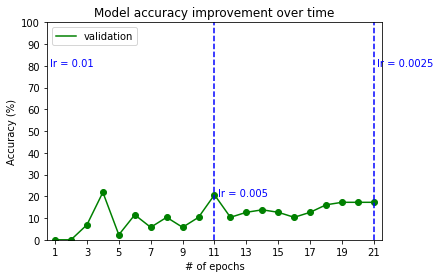

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


{CNN} Test set: Average loss: 26.8824, Accuracy: 1/96 (1%)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Models written to ['/gdrive/My Drive/COMP762_IntentionMining/out/AIM_CNN_DECA_within_0.9_2020-03-26_001246.joblib']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Updated /gdrive/My Drive/COMP762_IntentionMining/data/AIM_CNN_DECA_within_0.9.joblib


<IPython.core.display.Javascript object>

ValueError: ignored

In [ ]:
# @title Training

grid = widgets.Grid(3, 1)

# Bootstrap, Docker, Tensorflow, VSCode split 90% train/valid and 10% test
# train_valid_test_set = StanfordFiles(["bootstrap", "docker", "tensorflow", "vscode"])
# train_valid_test_set.shuffle()
# train_valid_set, test_set = train_valid_test_set.split(0.9)
# Train_NB_LR_SVM(train_valid_set, test_set, "bdtv_within_0.9", grid)
# Train_LSTM(train_valid_set, test_set, "bdtv_within_0.9", grid)
# Train_AIM_CNN(train_valid_set, test_set, "bdtv_within_0.9", grid)

# grid.remove()
# print("DONE")

# Within project (Bootstrap, Docker, Tensorflow, VSCode, and DECA) within 90% train/valid and 10% test
projects = ["bootstrap", "docker", "tensorflow", "vscode", "DECA"]
# for project in projects:
project = projects[4]
train_valid_test_set = StanfordFiles([project])
train_valid_test_set.shuffle()
train_valid_set, test_set = train_valid_test_set.split(0.9)
Train_NB_LR_SVM(train_valid_set, test_set, project + "_within_0.9", grid)
Train_LSTM(train_valid_set, test_set, project + "_within_0.9", grid)
Train_AIM_CNN(train_valid_set, test_set, project + "_within_0.9", grid)

drive.flush_and_unmount()

# # Cross projects (Bootstrap, Docker, Tensorflow, VSCode, and DECA) within 90% train/valid and 10% test
# projects = ["bootstrap", "docker", "tensorflow", "vscode", "DECA"]
# for test_project in projects:
#   train_valid_set = StanfordFiles([p for p in projects if p != test_project])
#   test_set = StanfordFiles([test_project])
#   Train_NB_LR_SVM(train_valid_set, test_set, project + "_cross", grid)
#   Train_LSTM(train_valid_set, test_set, project + "_cross", grid)
#   Train_AIM_CNN(train_valid_set, test_set, project + "_cross", grid)

In [ ]:
# @title [OLD; COMMENTED OUT]

# import matplotlib.pyplot as plt

# test_set = StanfordFiles(test_projects)
# test_set.shuffle()
# train_valid_set.Preprocess(test_set)

# for model_name in models:
#   models[model_name]['tfidf'].preprocessor = lambda x: x
#   models[model_name]['tfidf'].tokenizer = lambda sent: [str(t) for t in sent.tokens]
#   prediction = models[model_name].predict(train_valid_set.processed)

#   # train
#   train_count = 0;
#   for lab, pre in zip(train_valid_set.labels, prediction):
#     if label_to_int[lab] == pre:
#       train_count = 1 + train_count
#   prediction = models[model_name].predict(test_set.processed)

#   # test
#   test_count = 0;
#   for lab, pre in zip(test_set.labels, prediction):
#     if label_to_int[lab] == pre:
#       test_count = 1 + test_count

#   #print
#   print(hits[model_name], train_count / len(train_valid_set.processed), test_count / len(test_set.processed))

# #prediction = models['NaiveBayes'].predict(test_set.processed)